In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\HP\Downloads\virat_kohli.csv')

In [3]:
data

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08
...,...,...,...,...,...,...,...,...,...,...,...
127,45,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,26-Oct-16
128,65,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,29-Oct-16
129,122,105,8,5,116.19,3,caught,2,v England,Pune,15-Jan-17
130,8,5,2,0,160.00,3,caught,1,v England,Cuttack,19-Jan-17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int64  
 1   BF          132 non-null    int64  
 2   4s          132 non-null    int64  
 3   6s          132 non-null    int64  
 4   SR          132 non-null    float64
 5   Pos         132 non-null    int64  
 6   Dismissal   132 non-null    object 
 7   Inns        132 non-null    int64  
 8   Opposition  132 non-null    object 
 9   Ground      132 non-null    object 
 10  Start Date  132 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 11.5+ KB


In [5]:
data.describe()

,Runs,BF,4s,6s,SR,Pos,Inns
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,46.848485,50.871212,4.371212,0.545455,76.991212,3.303030,1.575758
std,41.994635,38.729716,4.404032,1.086795,37.874491,0.873174,0.496110
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,10.000000,17.750000,1.000000,0.000000,61.702500,3.000000,1.000000
50%,32.500000,42.500000,3.000000,0.000000,78.710000,3.000000,2.000000
75%,80.250000,82.250000,7.000000,1.000000,100.000000,4.000000,2.000000
max,154.000000,140.000000,18.000000,7.000000,209.090000,7.000000,2.000000


In [6]:
# Total Runs Between 18-Aug-08 - 22-Jan-17
total_runs = data["Runs"].sum()
print("Total Runs Between 18-Aug-08 - 22-Jan-17:", total_runs)

Total Runs Between 18-Aug-08 - 22-Jan-17: 6184


In [7]:
# Average Runs Between 18-Aug-08 - 22-Jan-17
average_runs = data["Runs"].mean()
print("Average Runs Between 18-Aug-08 - 22-Jan-17:", average_runs)

Average Runs Between 18-Aug-08 - 22-Jan-17: 46.84848484848485


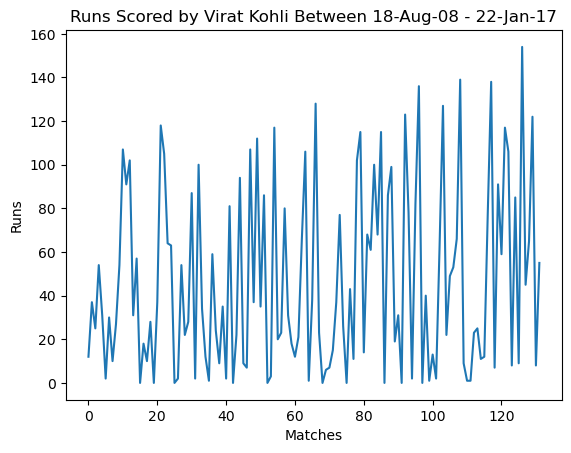

In [8]:
# Trend of runs scored by Virat Kohli
plt.plot(data.index, data["Runs"])
plt.xlabel("Matches")
plt.ylabel("Runs")
plt.title("Runs Scored by Virat Kohli Between 18-Aug-08 - 22-Jan-17")
plt.show()

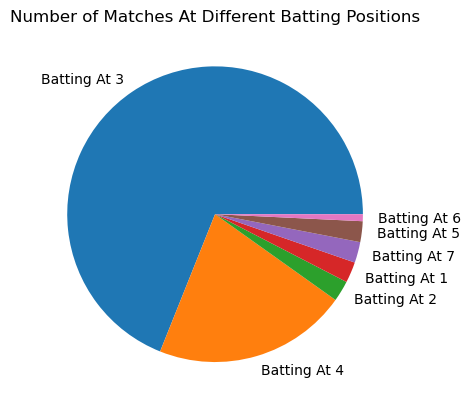

In [9]:
# Batting Positions
data["Pos"] = data["Pos"].map({3.0: "Batting At 3", 4.0: "Batting At 4", 2.0: "Batting At 2", 1.0: "Batting At 1", 7.0: "Batting At 7", 5.0: "Batting At 5", 6.0: "Batting At 6"})
position_counts = data["Pos"].value_counts()

plt.pie(position_counts, labels=position_counts.index)
plt.title("Number of Matches At Different Batting Positions")
plt.show()

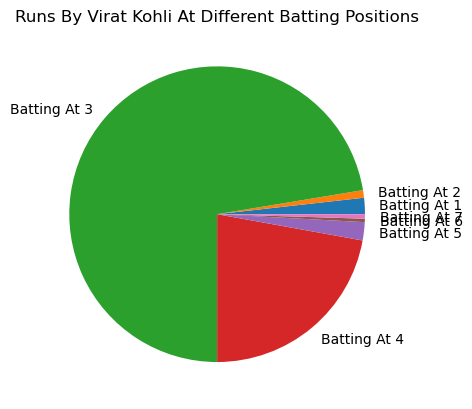

In [10]:
# Runs by Virat Kohli at different batting positions
position_runs = data.groupby("Pos")["Runs"].sum()

plt.pie(position_runs, labels=position_runs.index)
plt.title("Runs By Virat Kohli At Different Batting Positions")
plt.show()

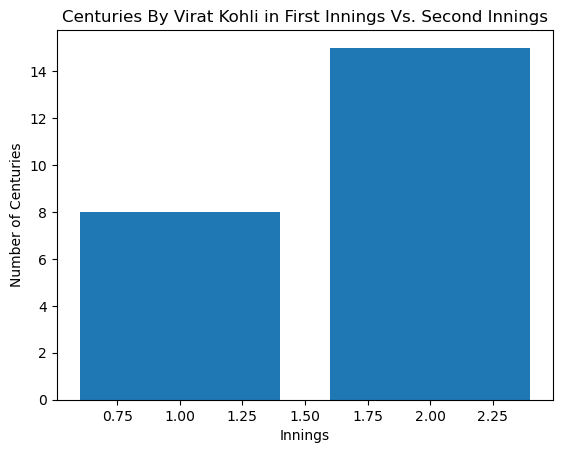

In [11]:
# Centuries by Virat Kohli in first innings vs. second innings
centuries = data[data["Runs"] >= 100]
innings_counts = centuries["Inns"].value_counts()

plt.bar(innings_counts.index, innings_counts)
plt.xlabel("Innings")
plt.ylabel("Number of Centuries")
plt.title("Centuries By Virat Kohli in First Innings Vs. Second Innings")
plt.show()

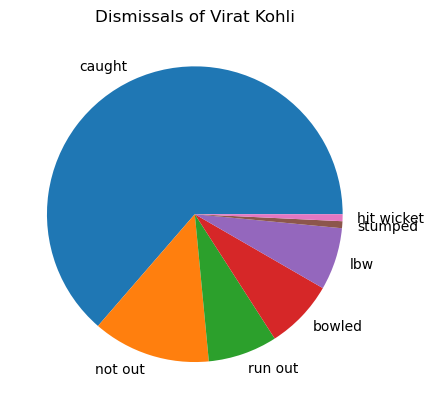

In [12]:
# Dismissals of Virat Kohli
dismissals = data["Dismissal"].value_counts()

plt.pie(dismissals, labels=dismissals.index)
plt.title("Dismissals of Virat Kohli")
plt.show()

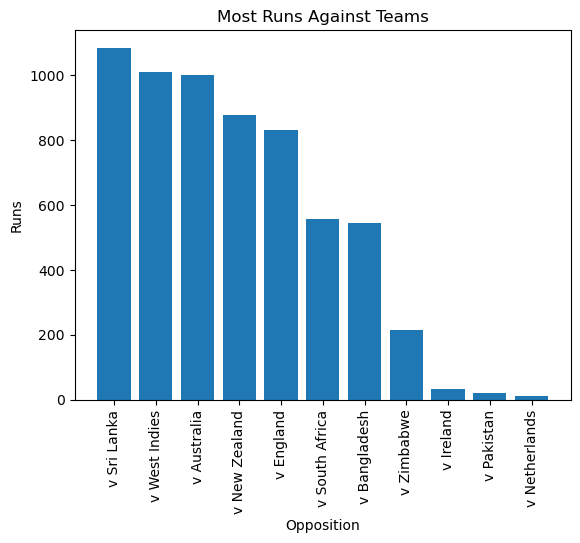

In [13]:
# Most runs against teams
runs_against_teams = data.groupby("Opposition")["Runs"].sum().sort_values(ascending=False)

plt.bar(runs_against_teams.index, runs_against_teams)
plt.xticks(rotation=90)
plt.xlabel("Opposition")
plt.ylabel("Runs")
plt.title("Most Runs Against Teams")
plt.show()

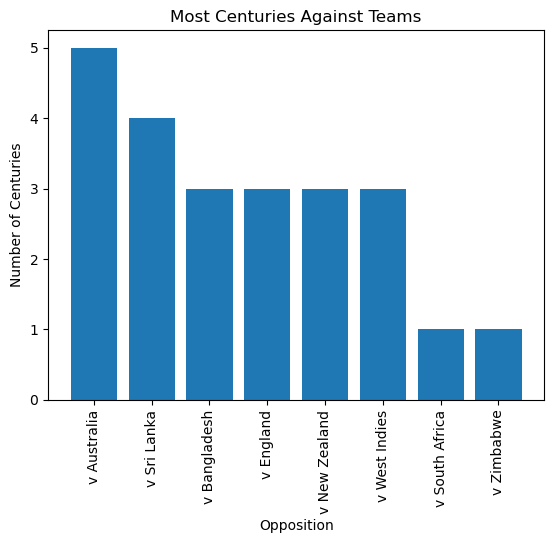

In [14]:
# Most centuries against teams
centuries_against_teams = centuries.groupby("Opposition")["Runs"].count().sort_values(ascending=False)

plt.bar(centuries_against_teams.index, centuries_against_teams)
plt.xticks(rotation=90)
plt.xlabel("Opposition")
plt.ylabel("Number of Centuries")
plt.title("Most Centuries Against Teams")
plt.show()